In [1]:
import sys
sys.path.insert(0, './models')

In [2]:
import tensorflow as tf
import numpy as np
import scipy.io as sio

from utils import *
from models.Alpha8L import *
from matplotlib import pyplot as plt
from admm import ADMM as algADMM

In [3]:
RGB = [22, 12, 4]
h = sio.loadmat('./data/kaist1.mat')['img']
h = np.expand_dims(h,0)         
Batch_size, Img_heigth , Img_width , Channels = h.shape                
coded_aperture = np.load('ca.npy')

y = dd_cassi(h,coded_aperture)

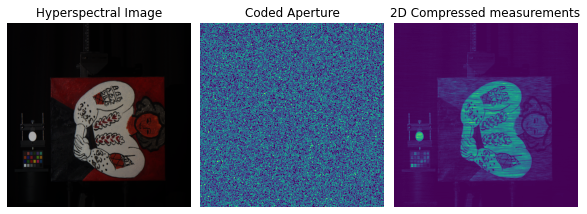

In [4]:
fig, axs = plt.subplots(1,3,constrained_layout=True , figsize=(8,3))
_ = [ x.axis('Off') for x in axs]

axs[0].imshow(h[0,:,:,:][:,:,RGB]) , axs[0].set_title('Hyperspectral Image')
axs[1].imshow(coded_aperture[0,:,:,0], aspect=1.06) , axs[1].set_title('Coded Aperture')
axs[2].imshow(y[0,:,:,0]), axs[2].set_title('2D Compressed measurements')
plt.show()

In [5]:
input_size = (Img_heigth, Img_width, Channels)
weights = './weights/Alpha8L_Kaist.h5'

In [6]:
optimizad = tf.keras.optimizers.Adam(learning_rate=1e-4)

main_model = HSI_net(coded_aperture, input_size=input_size,  pretrained_weights=weights)

autoencoder = main_model.autoencoder
encode = main_model.encoder
decode = main_model.decoder

autoencoder.compile(optimizer=optimizad, loss='mean_squared_error')
encode.compile(optimizer=optimizad, loss='mean_squared_error')
decode.compile(optimizer=optimizad, loss='mean_squared_error')

In [7]:
algorit_admm = algADMM(main_model)
epochs , steps = 2 , 2
params = [1 , 0.1 , 0.3]

In [21]:
h_est = algorit_admm(y,epochs,steps,params)

||temp-t_old||36.78386453092788||temp2-t2_old||45.4959515757306
||temp-t_old||67.284424||temp2-t2_old||43.8332
recons done


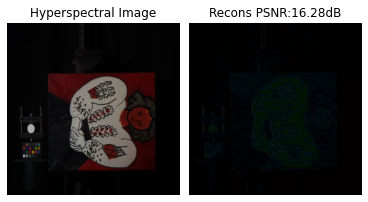

In [35]:
psnr = round( tf.image.psnr(h,h_est,1).numpy()[0],2)

fig, axs = plt.subplots(1,2,constrained_layout=True , figsize=(5,3))
_ = [ x.axis('Off') for x in axs]

axs[0].imshow(h[0,:,:,:][:,:,RGB]) , axs[0].set_title('Hyperspectral Image')
axs[1].imshow(h_est[0,:,:,:][:,:,RGB]) , axs[1].set_title('Recons PSNR:' + str(psnr) + 'dB')

plt.show()